- tousif@unm.edu



# Radioactivity 





The activity (A) of a radioactive nuclide is defined as the number of disintegration per unit time. $$A=-\frac{dN}{dt}=\lambda N$$

The laws of radioactive disintegration are:
- There is an equal probability for all nuclei of a radioactive element to
decay.
- The rate of spontaneous disintegration of a radioactive element is
proportional to the number of nuclei present at that time.

$$\frac{dN}{dt}\propto N$$

where N is the number of atoms present at time t. Removing proportionality
sign, we get
$$\frac{dN}{dt}=-\lambda N$$

where $\lambda$ is a constant of proportionality and is known as decay constant of the
element. Negative sign indicates that as t increases N decreases. Rewriting Eq.
$$\frac{dN}{N}=-\lambda dt$$
$$\ln N=-\lambda t+C$$
where C is constant of integration and is evaluated by the fact that at t = 0,
number of atoms of the radioactive element is $N_0$.Using this condition, we get
$$C=\ln N_0$$
 $$\boxed{N=N_0e^{-\lambda \,t}}$$

The exponential nature of this equation shows that it takes infinite time for
whole of the radioactive material to disintegrate.

Then activity becomes $$A=\lambda N_0e^{-\lambda \,t}$$
$$\boxed{A=A_0e^{-\lambda \,t}}$$

In this relation $A_0$ is the activity at $t = 0$. The exponential factor shows that
activity is decreasing with time in the same fashion as $N$.



# Unit:
The SI unit of activity is becquerel (Bq): 1 becquerel = 1 Bq = 1
disintegration/s (dps or disintegrations per second).

\begin{align*}
& 1 kBq =10^3 Bq\\
& 1 MBq =10^6 Bq\\
& 1 GBq =10^9 Bq
\end{align*}

# Poisson Statistics:

Consider now the numbers of decay are undergone by a radio active source in a period of time $\Delta t$ which is short compared to the half-life of the source. The activity of that source may then be considered as a constant. If repeated measurements of the number of decays n in the interval $\Delta t$ are now made, fluctuations will be observed from measurement to measurement. This is due to the statistical nature of decay process. From QM we know exact number of decays at any given time can never be predicted, only the probability of such event. From radioactivity it can be shown that the probability of obderving n counts n in a period $\Delta t$ is given by Poisson Distribution formula,

$$P(n,\Delta t)=\frac{\mu^n e^{-\mu}}{n!}$$

Where $\mu$ is the average number of counts in the period $\Delta t$. The standard deviation of the distribution is $\sigma=\sqrt{\mu}$

# Some Examples
- Example: A weak radioactive source is found to have mean count rate 1 counts/s. What is the probability of observing no counts at all in a perod of time $\Delta t=4\,s?$ One counts in $4\,s?$

- Solution: For a priod $\Delta t=4\,s$, the mean count rate is obviously $\mu= 4$. Using the poisson distribution we find,
$$P(0,4)=\frac{4^0 e^{-4}}{0!}=0.0183156388887342$$
$$P(1,4)=\frac{4^1 e^{-4}}{1!}=0.0732625555549367$$



- Problem: Am Source has strength 60,000 Bq.  Given a trigger (alpha decay), what is the probability of a second decay in 13 microseconds?
- Solution: $$1 Bq=1 \,dps/s$$.
$$60000 Bq=60000 \,dps/s$$

https://en.wikipedia.org/wiki/Americium-241

That means Am nuclei has $60000 \,\,counts/s$. If we observe for the period $\Delta t=13 \mu s$ and then average counts we will expect $60000*13 \mu s=780000*10^{-6}$.

In [15]:
import numpy as np

In [16]:
mu=780000*1e-6
n=1 
def poisson(n,mu): #poisson statistics
    P=mu**(n)*np.exp(-mu)/np.math.factorial(n)
    return P

In [17]:
poisson(n,mu)
print("Probability of getting next counts in 13 micro-seconds is :{} ".format(poisson(n,mu)))

Probability of getting next counts in 13 micro-seconds is :0.35755668881807434 


- Remark: For a given source like Americium with 60 KBq radioactivity, the probability of getting a decay event in the period of $13\mu s$ is $\approx 36$% 

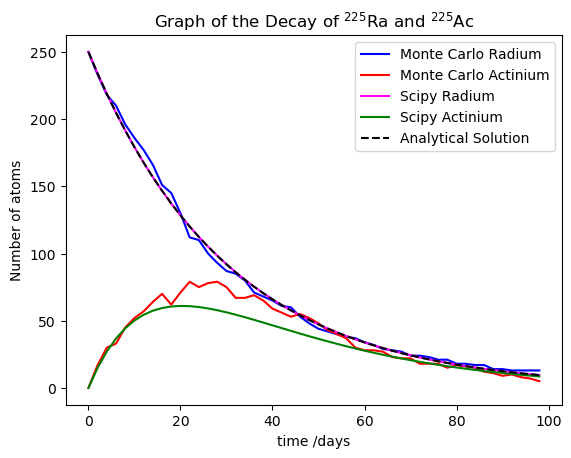

In [19]:
import numpy
import matplotlib.pyplot as pyplot
import scipy.integrate
import random


t_half_rad   = 20.8 #initial conditions
t_half_act   = 10.0
N0           = 250
t1           = 100
n_timepoints = 50

def analytic(N0, timebase):
    '''Analytic solution for the radium count'''
    return N0 * numpy.exp (-timebase /t_half_rad * numpy.log(2))
    
def simulate_monte_carlo(N0, t1, n_timepoints):
    '''Monte carlo simulation for both radium and actinium counts'''
    dt             = t1 / n_timepoints #Calculating the interval between each time division
    count_radium   = numpy.zeros((n_timepoints)) #creating zero arrays to put the counts into
    count_actinium = numpy.zeros((n_timepoints))
    atoms          = numpy.ones((N0)) #Creating an array of numbers to represent the atoms in the simulation
    p_decay_rad    = 1 - numpy.exp(-dt / t_half_rad * numpy.log(2)) #Calculating the decay probabilities in the time interval
    p_decay_act    = 1 - numpy.exp(-dt / t_half_act * numpy.log(2))
    for idx_time in range(n_timepoints):
        
        count_radium[idx_time]   = (atoms == 1).sum() #Counting how many atoms of each type remain in the interval
        count_actinium[idx_time] = (atoms == 2).sum()
        
        for idx_atom in range(N0):
            
            if atoms[idx_atom] == 1: #Deciding whether the given atom should decay
                if random.random() <= p_decay_rad:
                    atoms[idx_atom] = 2
                else:
                    atoms[idx_atom] = 1
            elif atoms[idx_atom] == 2:
                if random.random() <= p_decay_act:
                    atoms[idx_atom] = 3
                else:
                    atoms[idx_atom] = 2
                
    return count_radium, count_actinium

timebase = numpy.arange(0, t1, t1/n_timepoints) #creating the array of times for use in the analytic solution and scipy
n_analytic = analytic(N0,  timebase) #Calling the analytic solution
n_rad, n_act = simulate_monte_carlo(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   

def f(N, t):
    '''Differential for the decay, for use with scipy.integrate.odeint'''
    N_rad, N_act = N #unpacking N
    tau_rad = t_half_rad / numpy.log(2)
    tau_act = t_half_act / numpy.log(2)
    DEQ_rad = - N_rad / tau_rad
    DEQ_act = - N_act / tau_act + N_rad / tau_rad
    
    return numpy.array((DEQ_rad, DEQ_act)) #repacking

N0_rad = 250 #Initial conditions for scipy
N0_act = 0
N0 = numpy.array((N0_rad, N0_act))
n_scipy = scipy.integrate.odeint(f, N0, timebase) #Calling scipy odeint

pyplot.figure() #Plotting code
pyplot.plot(timebase, n_rad, label = 'Monte Carlo Radium', color = 'blue')
pyplot.plot(timebase, n_act, label = 'Monte Carlo Actinium', color = 'red')
pyplot.plot(timebase, n_scipy[:,0], label = 'Scipy Radium', color = 'magenta')
pyplot.plot(timebase, n_scipy[:,1], label = 'Scipy Actinium', color = 'green')
pyplot.plot(timebase, n_analytic, label = 'Analytical Solution', color = 'black', linestyle = '--')
pyplot.title('Graph of the Decay of $^{225}$Ra and $^{225}$Ac')
pyplot.ylabel('Number of atoms')
pyplot.xlabel('time /days')
pyplot.legend(loc='upper right') 
pyplot.show()